<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
import Pkg
Pkg.add("Distributions")
using Distributions

    Updating registry at `C:\Users\micke\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\micke\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\micke\.julia\environments\v1.8\Manifest.toml`


In [6]:
function binomial_p(n, k, p)
    P = (factorial(n) ./ (factorial(k) .* factorial(n-k))) .* (p^k) .* ((1 .- p)^(n .-k))
end

binomial_p (generic function with 1 method)

In [7]:
binomial_p(10, 2, 0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [8]:
win = binomial_p(10, 5, 0.4)

0.20065812480000003

The chance of losing the bet:

In [9]:
lose = 1-win

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [10]:
Expected_outcome = (win .* 10) + (lose .* -10)

-5.986837504

I expect myself to lose money in the game because the expected outcome is negative.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [12]:
win2 = binomial_p(10, 4, 0.4)

0.250822656

In [13]:
lose2 = 1 - win2

0.749177344

In [14]:
Expected_outcome2 = (win2 .* 10) + (lose2 .* -10)

-4.9835468800000005

Similar to the first scenario, I would also expect myself to lose money in this case because the expected outcome remains negative.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\micke\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\micke\.julia\environments\v1.8\Project.toml`
  [10745b16] + Statistics
  No Changes to `C:\Users\micke\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [3]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [7]:
using Plots
using Polynomials
using Random
using Statistics

In [8]:
line_fit=fit(x,y_observed,1)

Polynomial(-0.9714086909104507 + 2.729972979864467*x)

In [9]:
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 -0.9714086909104507
  2.729972979864467

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [10]:
function chisqr(b,m,x,y_observed,sigma)
    return sum((y_observed .- m .* x .-b) .^2/sigma^2)
end

chisqr (generic function with 1 method)

In [11]:
chisqr(fit_coeff[1], fit_coeff[2], x, y_observed, sigma)

15.13589048283242

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [22]:
chi2_list = []
for i in 1:10000
    y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,3),length(x))
    fit_coeff = coeffs(fit(x, y_observed, 1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,3))
end


### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [23]:
mean(chi2_list)

8.962398517856633

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [24]:
x_dist = 0:0.1:30
chi2 = di.Chisq(9)

Distributions.Chisq{Float64}(ν=9.0)

In [25]:
di.pdf.(chi2,[1,2,3])

3-element Vector{Float64}:
 0.002304483090658508
 0.015813618949355977
 0.03964637052096923

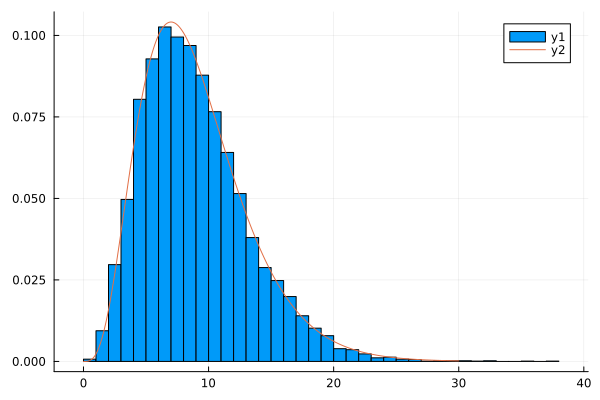

In [27]:
histogram(chi2_list, bin=50, normalize = true)
plot!(x_dist, di.pdf.(di.Chisq(9),x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [28]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [29]:
m_range = 1:0.01:5
b_range = -7:0.01:3

-7.0:0.01:3.0

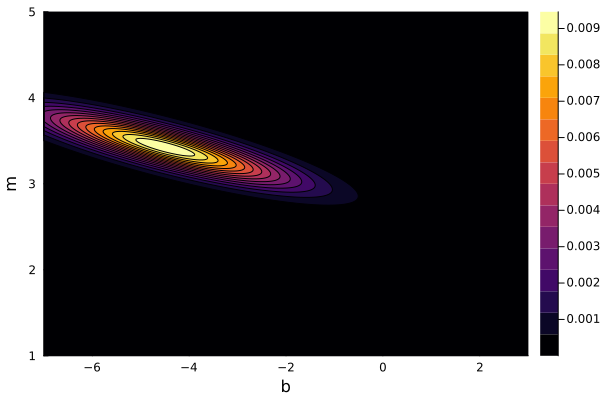

In [30]:
contourf(b_range, m_range, p_chi2poly, xlabel ="b", ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

In [31]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

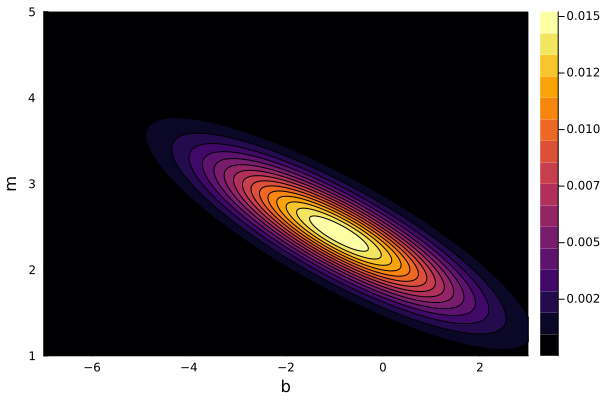

In [32]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range, m_range, p_chi2poly, xlabel ="b", ylabel="m")


The only variable that changed from the contour plot 2.6 to this one is the x. The amount of data points remain the same but the range has decreased. This resulted in a larger m range, visualized by the increase in tilt of the contour plot. 

In [33]:
x = 0:2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

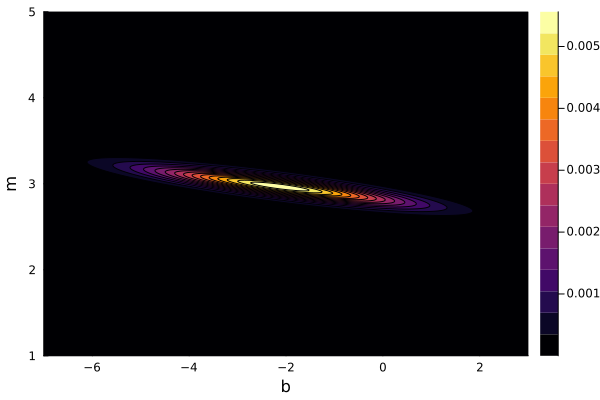

In [34]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range, m_range, p_chi2poly, xlabel ="b", ylabel="m")

This contout plot also has a redfeined x compared to the contour plot in 2.6. However, in this scenario, the x range increased, causing the m range to decrease, while the amount of data points remains the same. The decrease in the m range is visualized by the decrease in tilt of the contour plot.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

In [37]:
x=0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

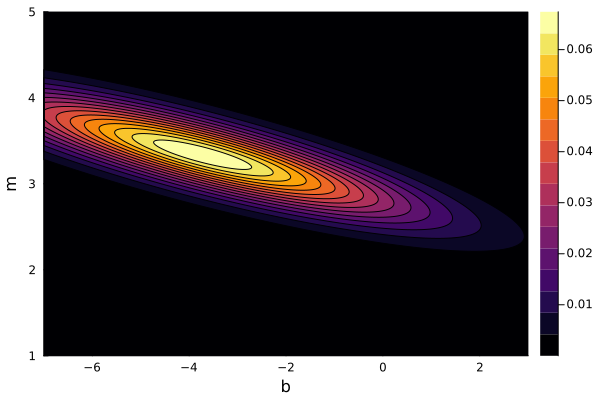

In [38]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range, m_range, p_chi2poly, xlabel ="b", ylabel="m")

The variable that was redefined was sigma which was increased from 3 to 5, affecting the b range. The b range has increased as visualized by the horizonal enlargement of the contour plot in 2.8 compared to the plot in 2.6.

In [39]:
x=0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

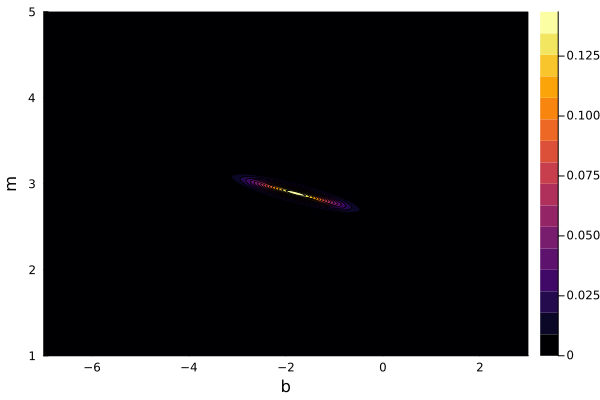

In [40]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range, m_range, p_chi2poly, xlabel ="b", ylabel="m")

Similar to the previous scenario, the sigma was redefined and decreased from 3 to 1. This caused the b range to decrease as well, as visualized by the decrease in size of the contour plot compared to the plot in 2.6.